In [1]:
import numpy as np
import pandas as pd
# Import machine learning methods
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import auc, roc_curve, RocCurveDisplay, f1_score, precision_score, \
                            recall_score, confusion_matrix, ConfusionMatrixDisplay


In [3]:
download_required = True

if download_required:

    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '1804_python_healthcare/master/titanic/data/processed_data.csv'

    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='../datasets/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data
    data.to_csv(data_directory + 'processed_titanic_data.csv', index=False)

In [4]:
data = pd.read_csv('../datasets/processed_titanic_data.csv')
# Make all data 'float' type
data = data.astype(float)

In [5]:
data.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeImputed,EmbarkedImputed,CabinLetterImputed,...,Embarked_missing,CabinLetter_A,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_missing
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6.0,0.0,3.0,28.0,0.0,0.0,8.4583,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7.0,0.0,1.0,54.0,0.0,0.0,51.8625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,8.0,0.0,3.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9.0,1.0,3.0,27.0,0.0,2.0,11.1333,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,10.0,1.0,2.0,14.0,1.0,0.0,30.0708,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeImputed,EmbarkedImputed,CabinLetterImputed,...,Embarked_missing,CabinLetter_A,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_missing
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.198653,0.002245,0.771044,...,0.002245,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.399210,0.047351,0.420397,...,0.047351,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Drop Passengerid (axis=1 indicates we are removing a column rather than a row)
# We drop passenger ID as it is not original data
# inplace=True means change the dataframe itself - don't create a copy with this column dropped

data.drop('PassengerId', inplace=True, axis=1)

## Divide into X (features) and y (labels)

In [8]:
X = data.drop('Survived',axis=1) # X = all 'data' except the 'survived' column
y = data['Survived'] # y = 'survived' column from 'data'

## Divide into training and tets sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## Fit random forest model

In [10]:
model = RandomForestClassifier(random_state=42)
model = model.fit(X_train,y_train)

## Predict values

In [11]:
# Predict training and test set labels
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Calculate accuracy

In [12]:
# The shorthand below says to check each predicted y value against the actual
# y value in the training data.  This gives a list of True and False values
# for each prediction, where True indicates the predicted value matches the
# actual value.  Then we take the mean of these Boolean values, which gives
# us a proportion (where if all values were True, the proportion would be 1.0)
# If you want to see why that works, just uncomment the following line of code
# to see what y_pred_train == y_train is doing.
# print (y_pred_train == y_train)
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print (f'Accuracy of predicting training data = {accuracy_train}')
print (f'Accuracy of predicting test data = {accuracy_test}')

Accuracy of predicting training data = 0.9835329341317365
Accuracy of predicting test data = 0.8026905829596412


In [13]:
# Show first ten predicted classes
classes = model.predict(X_test)
classes[0:10]

array([0., 0., 0., 1., 0., 1., 1., 0., 1., 1.])

In [14]:
# Show first ten predicted probabilities
probabilities = model.predict_proba(X_test)
probabilities[0:10]

array([[0.76     , 0.24     ],
       [0.98     , 0.02     ],
       [0.94     , 0.06     ],
       [0.04     , 0.96     ],
       [0.67     , 0.33     ],
       [0.08     , 0.92     ],
       [0.1572482, 0.8427518],
       [0.93     , 0.07     ],
       [0.32     , 0.68     ],
       [0.12     , 0.88     ]])

## Calculate F1 Score

In [15]:
f1_score(y_test, y_pred_test, average=None)

array([0.83703704, 0.75      ])

In [16]:
f1_score(y_test, y_pred_test, average='micro')

0.8026905829596412

In [17]:
f1_score(y_test, y_pred_test, average='macro')

0.7935185185185185

In [18]:
f1_score(y_test, y_pred_test, average='weighted')

0.8023002823451255

## Plot tree

https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

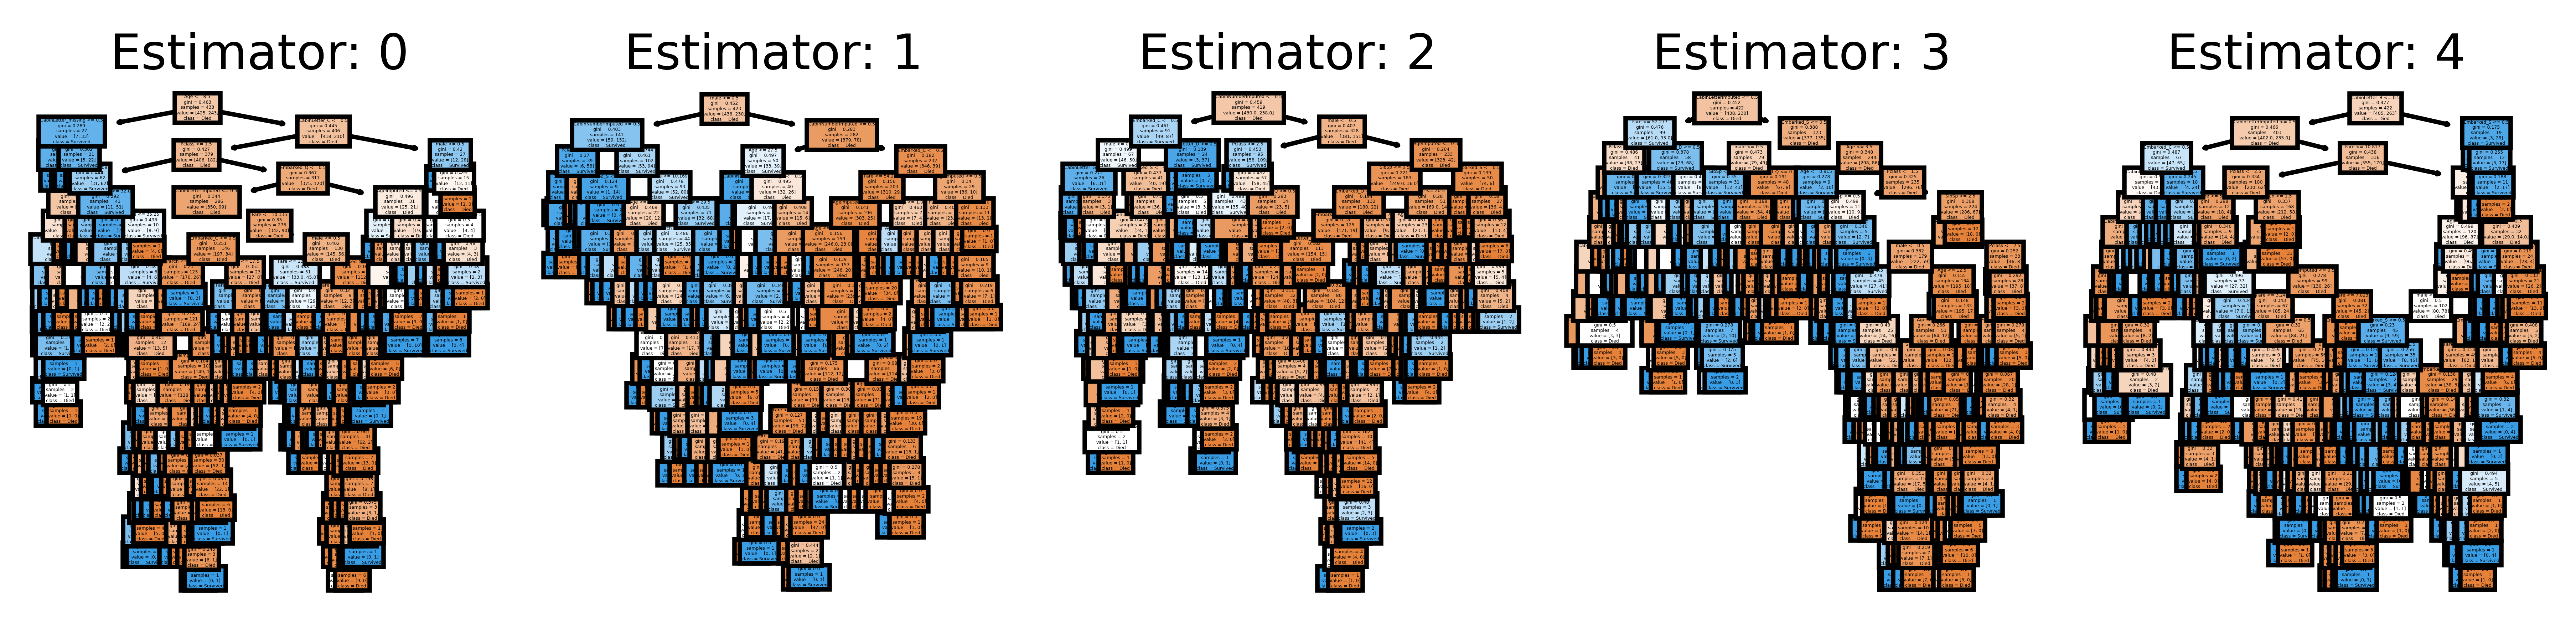

In [117]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10,2), dpi=900)
for index in range(0, 5):
    plot_tree(model.estimators_[index],
    feature_names=data.drop('Survived',axis=1).columns.tolist(),
    class_names=['Died', 'Survived'],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

# Comparing Performance

In [28]:
def train_and_run(model):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)

    print (f'Accuracy of predicting training data = {accuracy_train:.3f}')
    print (f'Accuracy of predicting test data = {accuracy_test:.3f}')

    print(f"F1 score: no averaging = {[f'{i:.3f}' for i in f1_score(y_test, y_pred_test, average=None)]}")
    print(f"F1 score: micro = {f1_score(y_test, y_pred_test, average="micro"):.3f}")
    print(f"F1 score: macro = {f1_score(y_test, y_pred_test, average="macro"):.3f}")
    print(f"F1 score: weighted = {f1_score(y_test, y_pred_test, average="weighted"):.3f}")

In [29]:
from sklearn.tree import DecisionTreeClassifier
train_and_run(model = DecisionTreeClassifier())

Accuracy of predicting training data = 0.984
Accuracy of predicting test data = 0.758
F1 score: no averaging = ['0.795', '0.703']
F1 score: micro = 0.758
F1 score: macro = 0.749
F1 score: weighted = 0.759


In [38]:
np.random.seed(42)
train_and_run(model = RandomForestClassifier(random_state=42))

Accuracy of predicting training data = 0.984
Accuracy of predicting test data = 0.794
F1 score: no averaging = ['0.830', '0.739']
F1 score: micro = 0.794
F1 score: macro = 0.784
F1 score: weighted = 0.793


#### Random Forest

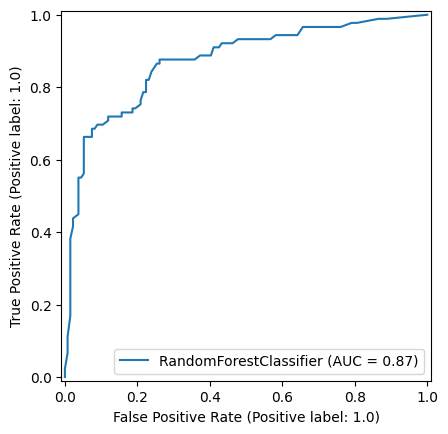

In [27]:
np.random.seed(42)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model = random_forest_model.fit(X_train,y_train)

y_pred_train_rf = random_forest_model.predict(X_train)
y_pred_test_rf = random_forest_model.predict(X_test)

roc_curve_rf = RocCurveDisplay.from_estimator(
    random_forest_model, X_test, y_test
)

confusion_matrix_rf = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_rf
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_rf_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_rf,
        normalize='true'
        ),
        display_labels=["Died", "Survived"]
)


#### Decision Tree

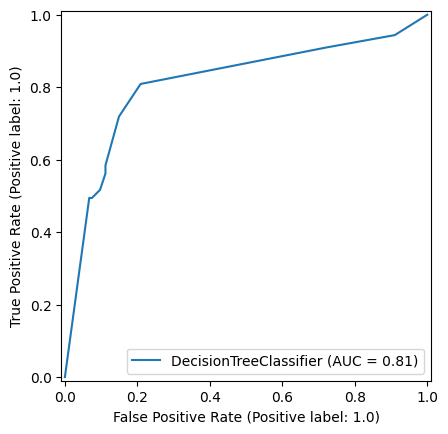

In [122]:
np.random.seed(42)

decision_tree_model = DecisionTreeClassifier(max_depth=6)
decision_tree_model = decision_tree_model.fit(X_train,y_train)

y_pred_train_dt = decision_tree_model.predict(X_train)
y_pred_test_dt = decision_tree_model.predict(X_test)

roc_curve_dt = RocCurveDisplay.from_estimator(
    decision_tree_model, X_test, y_test
)

confusion_matrix_dt = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_dt
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_dt_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_dt,
        normalize='true'
        ),
        display_labels=["Died", "Survived"]
)


#### Logistic Regression

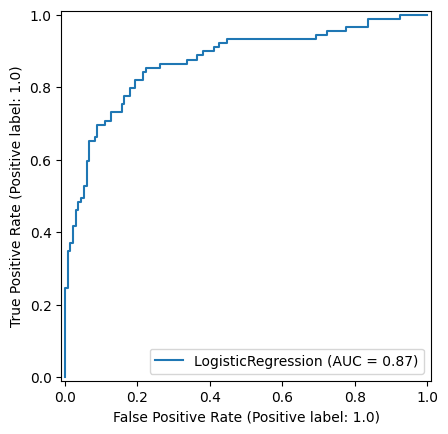

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

def standardise_data(X_train, X_test):

    # Initialise a new scaling object for normalising input data
    sc = StandardScaler()

    # Apply the scaler to the training and test sets
    train_std=sc.fit_transform(X_train)
    test_std=sc.fit_transform(X_test)

    return train_std, test_std

X_train_standardised, X_test_standardised = standardise_data(X_train, X_test)

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_standardised,y_train)

y_pred_train_lr = logistic_regression_model.predict(X_train_standardised)
y_pred_test_lr = logistic_regression_model.predict(X_test_standardised)

roc_curve_lr = RocCurveDisplay.from_estimator(
    logistic_regression_model, X_test_standardised, y_test
)

confusion_matrix_lr = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_lr
        ),
        display_labels=["Died", "Survived"]
)

confusion_matrix_lr_normalised = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test_lr,
        normalize='true'
        ),
        display_labels=["Died", "Survived"]
)


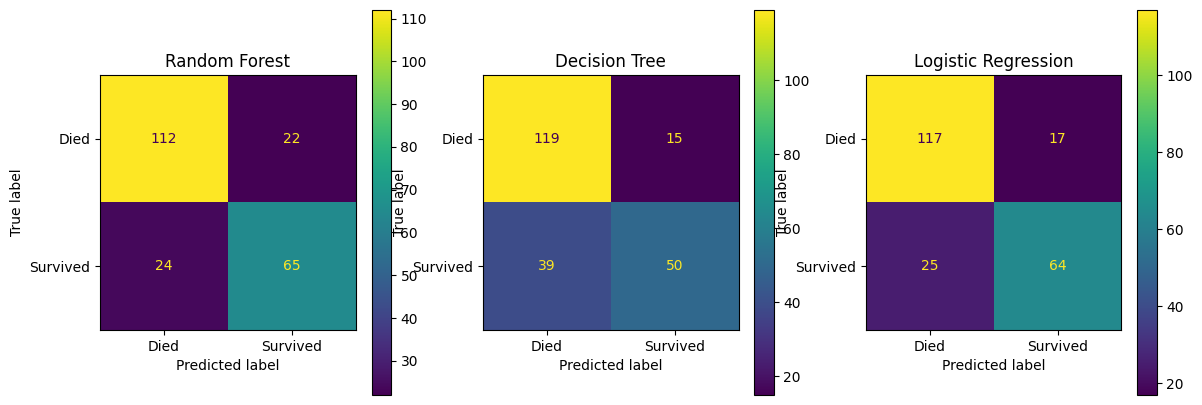

In [124]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))
confusion_matrix_rf.plot(ax=ax1)
ax1.title.set_text('Random Forest')

confusion_matrix_dt.plot(ax=ax2)
ax2.title.set_text('Decision Tree')

confusion_matrix_lr.plot(ax=ax3)
ax3.title.set_text('Logistic Regression')

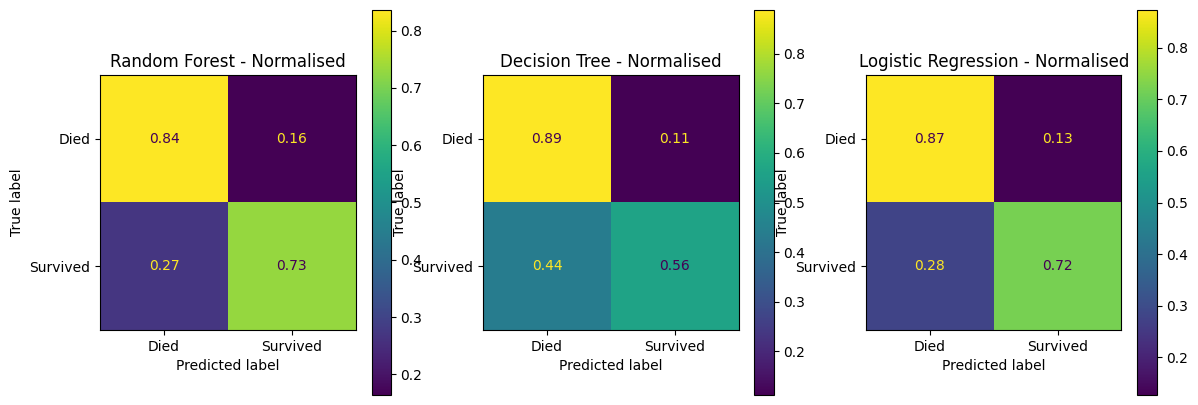

In [125]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))
confusion_matrix_rf_normalised.plot(ax=ax1)
ax1.title.set_text('Random Forest - Normalised')

confusion_matrix_dt_normalised.plot(ax=ax2)
ax2.title.set_text('Decision Tree - Normalised')

confusion_matrix_lr_normalised.plot(ax=ax3)
ax3.title.set_text('Logistic Regression - Normalised')

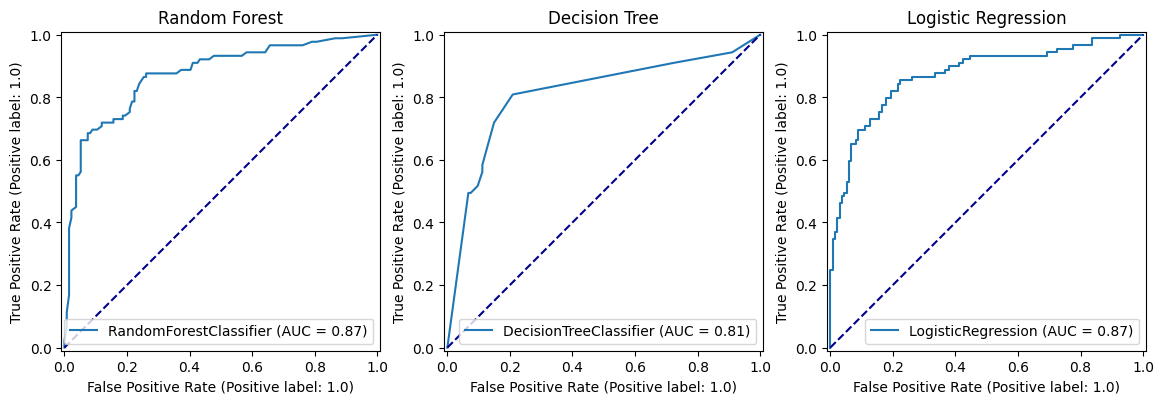

In [126]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

roc_curve_rf.plot(ax=ax1)
ax1.title.set_text('Random Forest')
ax1.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

roc_curve_dt.plot(ax=ax2)
ax2.title.set_text('Decision Tree')
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

roc_curve_lr.plot(ax=ax3)
ax3.title.set_text('Logistic Regression')
ax3.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

## Hyperparameters

### n estimators (trees per forest)

In [127]:
accuracy_results = []

for i in range(10, 500, 10):
    model = model = RandomForestClassifier(n_estimators=i, random_state=42)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'n_estimators': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='n_estimators'),
        x='n_estimators', y='value', color='variable')

In [128]:
pd.DataFrame(accuracy_results).set_index("n_estimators").sort_values(by=["accuracy_test"], ascending=False)

,accuracy_train,accuracy_test
n_estimators,,
30,0.980539,0.807175
40,0.980539,0.807175
50,0.982036,0.802691
20,0.980539,0.802691
10,0.976048,0.798206
60,0.983533,0.798206
70,0.983533,0.798206
80,0.983533,0.798206
90,0.983533,0.798206


### n estimators (trees per forest) - with max depth of 8

In [129]:
accuracy_results = []

for i in range(10, 200, 10):
    model = RandomForestClassifier(n_estimators=i, random_state=42, max_depth=8)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)
    accuracy_results.append({'accuracy_train': accuracy_train, 'accuracy_test': accuracy_test, 'n_estimators': i})

px.line(pd.DataFrame(accuracy_results).melt(id_vars='n_estimators'),
        x='n_estimators', y='value', color='variable')

In [130]:
pd.DataFrame(accuracy_results).set_index("n_estimators").sort_values(by=["accuracy_test"], ascending=False)

,accuracy_train,accuracy_test
n_estimators,,
190,0.919162,0.829596
180,0.922156,0.829596
170,0.923653,0.829596
150,0.922156,0.829596
140,0.922156,0.829596
90,0.919162,0.829596
110,0.920659,0.825112
160,0.923653,0.825112
130,0.920659,0.825112


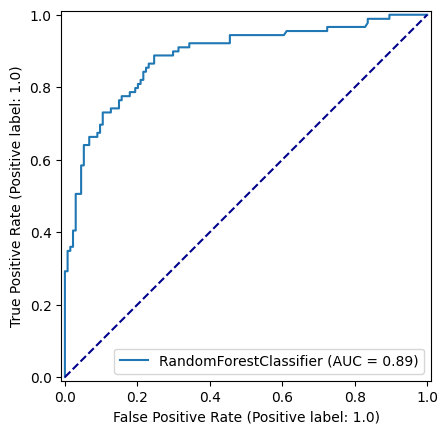

In [141]:
np.random.seed(42)

best_n_estimators = pd.DataFrame(accuracy_results).sort_values(by=["accuracy_test"], ascending=False).head(1)['n_estimators'].values[0]

model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42, max_depth=8)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

roc_curve = RocCurveDisplay.from_estimator(
    model, X_test, y_test
)

fig = roc_curve.figure_
ax = roc_curve.ax_


ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')


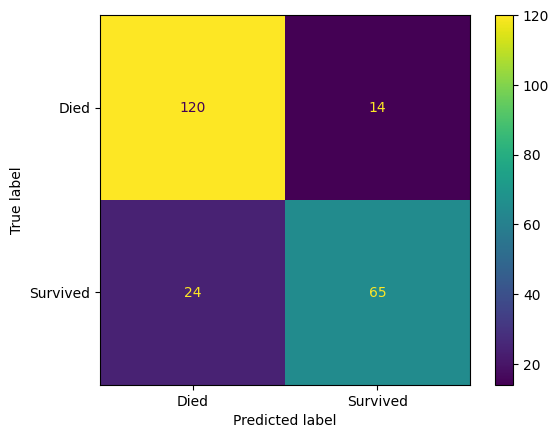

In [142]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test
        ),
        display_labels=["Died", "Survived"]
).plot()


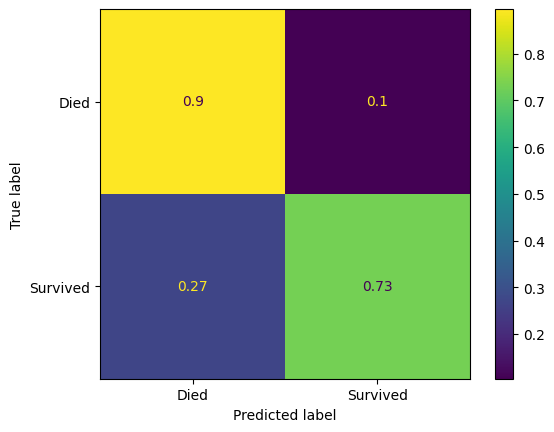

In [143]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(
        y_true=y_test,
        y_pred=y_pred_test,
        normalize='true'
        ),
        display_labels=["Died", "Survived"]
).plot()